In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

# 读取数据
data = pd.read_csv('..\\temp\\K-means++聚类.csv', encoding='utf-8')  # 读取数据
#data = pd.read_csv("..\\temp\\DBS聚类.csv", encoding='utf-8')  # 读取数据
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial_No.         400 non-null    int64  
 1   GRE_Score          400 non-null    int64  
 2   TOEFL_Score        400 non-null    int64  
 3   University_Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance_of_Admit    400 non-null    float64
 9   Cluster (K-means)  400 non-null    int64  
 10  Cluster            400 non-null    int64  
dtypes: float64(4), int64(7)
memory usage: 34.5 KB


In [8]:
# 异常值处理
# 计算均值和标准差
mean_value = data.mean()
std_dev = data.std()

# 定义异常值阈值
threshold = 3

# 筛选出异常值的索引
outliers = (data - mean_value).abs() > threshold * std_dev

# 删除异常值所在的行
data = data[~outliers]
data.dropna(inplace=True)

data.info()

# 选择相关特征和目标列
features = ['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR', 'CGPA','Research']
target = 'Chance_of_Admit'


<class 'pandas.core.frame.DataFrame'>
Index: 399 entries, 0 to 399
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial_No.         399 non-null    int64  
 1   GRE_Score          399 non-null    int64  
 2   TOEFL_Score        399 non-null    int64  
 3   University_Rating  399 non-null    int64  
 4   SOP                399 non-null    float64
 5   LOR                399 non-null    float64
 6   CGPA               399 non-null    float64
 7   Research           399 non-null    int64  
 8   Chance_of_Admit    399 non-null    float64
 9   Cluster (K-means)  399 non-null    int64  
 10  Cluster            399 non-null    int64  
dtypes: float64(4), int64(7)
memory usage: 37.4 KB


线性回归模型：
均方误差: 0.003985660723599182
决定系数: 0.8007555984685373
平均绝对误差: 0.04497264056283062
---------------------------------
SLISE方法回归：
均方误差: 0.00534667317933961
决定系数: 0.7748621070611652
平均绝对误差: 0.05358194035946
---------------------------------
随机森林回归模型：
均方误差: 0.005506020375000008
决定系数: 0.7681523100203957
平均绝对误差: 0.05503375000000005


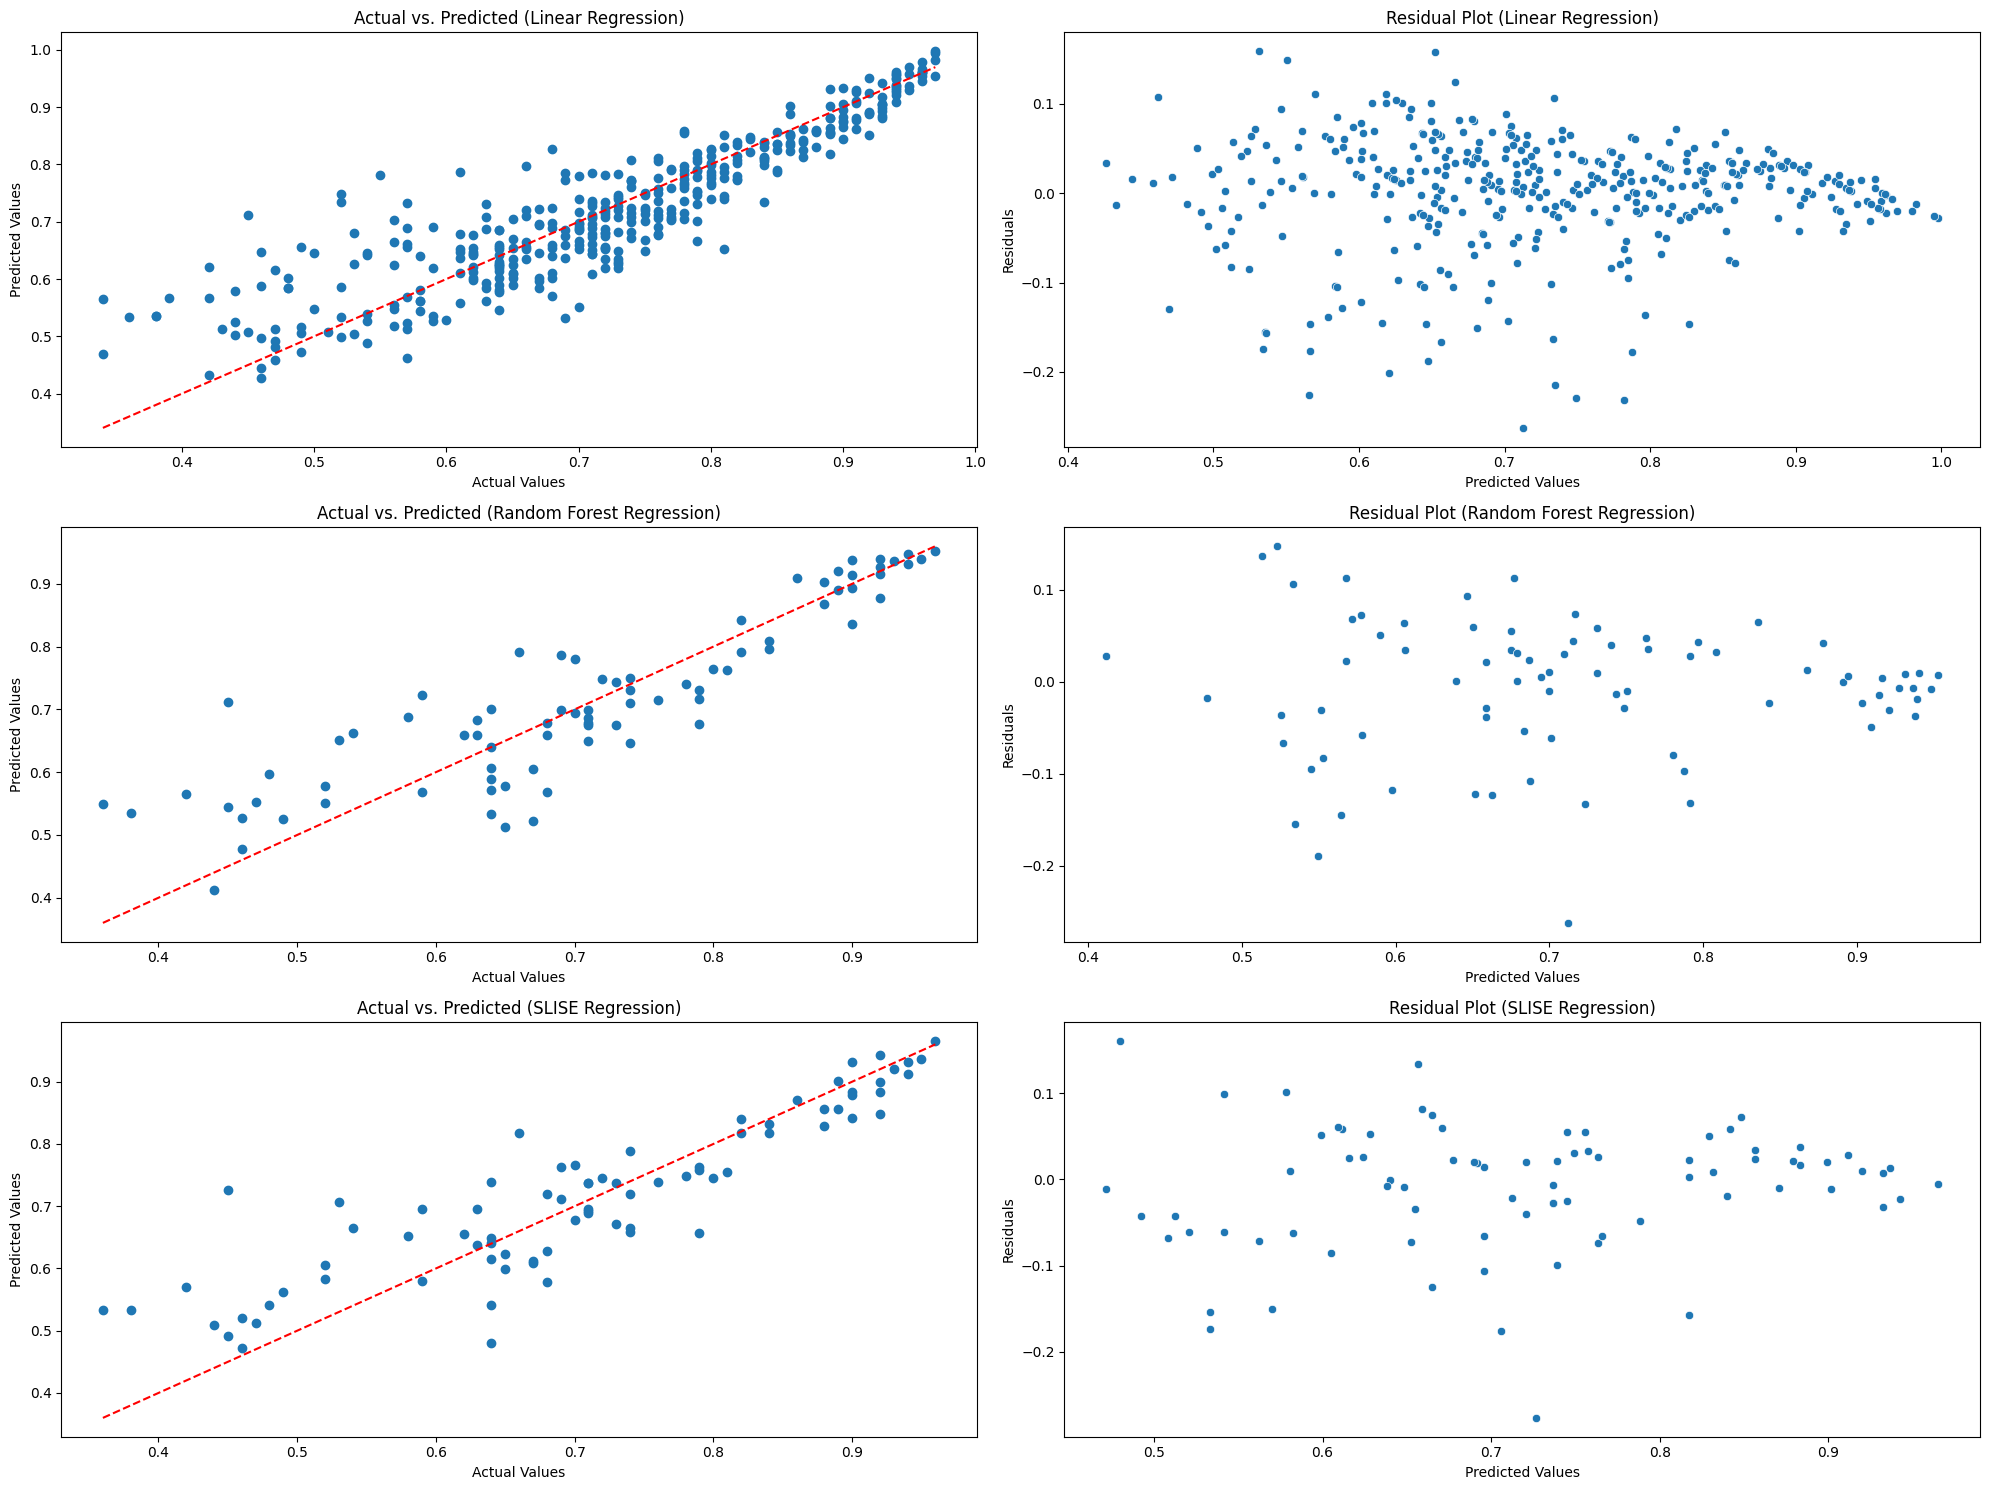

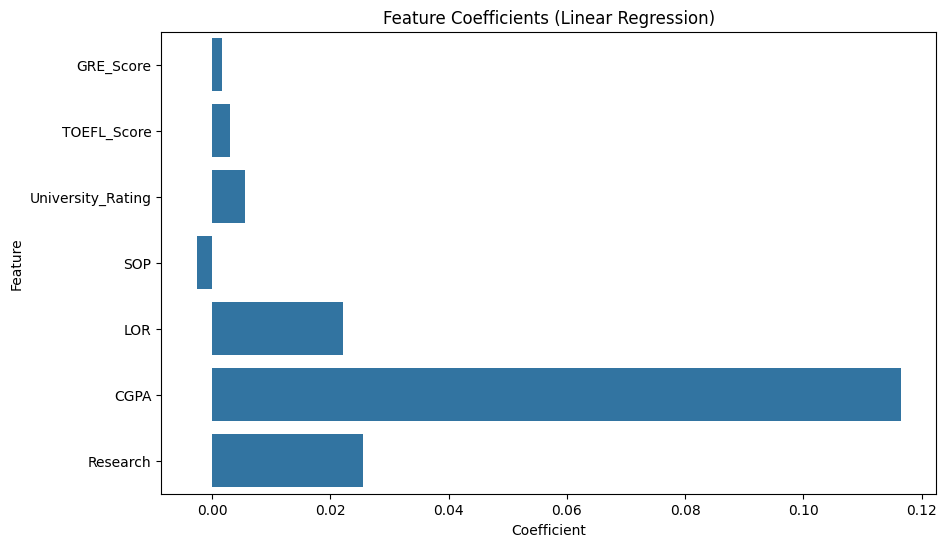

Coefficients: [ 0.00175413  0.00297914  0.00551551 -0.00261854  0.02216731  0.11650679
  0.02550477]
Intercept: -1.2516445803741623


In [9]:
# 划分训练集和测试集
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 建立线性回归模型
regressor_linear = LinearRegression()
regressor_linear.fit(X, y)

# 预测录取概率
y_pred_linear = regressor_linear.predict(X)

# 计算线性回归模型的均方误差、决定系数和平均绝对误差
mse_linear = mean_squared_error(y, y_pred_linear)
r2_linear = r2_score(y, y_pred_linear)
mae_linear = mean_absolute_error(y, y_pred_linear)

# 建立随机森林回归模型
regressor_rf = RandomForestRegressor(n_estimators=100, random_state=42)
regressor_rf.fit(X_train, y_train)

# 在测试集上进行预测
y_pred_rf = regressor_rf.predict(X_test)

# 计算随机森林回归模型的均方误差、决定系数和平均绝对误差
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

# 使用SLISE进行特征选择
regressor_slise = LinearRegression()
sfm = SelectFromModel(regressor_slise)
X_train_selected = sfm.fit_transform(X_train, y_train)
X_test_selected = sfm.transform(X_test)

# 建立回归模型
regressor_slise.fit(X_train_selected, y_train)

# 在测试集上进行预测
y_pred_slise = regressor_slise.predict(X_test_selected)

# 计算SLISE方法回归的均方误差、决定系数和平均绝对误差
mse_slise = mean_squared_error(y_test, y_pred_slise)
r2_slise = r2_score(y_test, y_pred_slise)
mae_slise = mean_absolute_error(y_test, y_pred_slise)

# 输出结果
print('线性回归模型：')
print('均方误差:', mse_linear)
print('决定系数:', r2_linear)
print('平均绝对误差:', mae_linear)
print('---------------------------------')
print('SLISE方法回归：')
print('均方误差:', mse_slise)
print('决定系数:', r2_slise)
print('平均绝对误差:', mae_slise)
print('---------------------------------')
print('随机森林回归模型：')
print('均方误差:', mse_rf)
print('决定系数:', r2_rf)
print('平均绝对误差:', mae_rf)

# 绘制 Actual vs. Predicted 和 Residual Plot 到同一张图上
plt.figure(figsize=(20, 15))

# Linear Regression
plt.subplot(3, 2, 1)
plt.scatter(y, y_pred_linear)
plt.plot([min(y), max(y)], [min(y), max(y)], 'r--')
plt.title('Actual vs. Predicted (Linear Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.subplot(3, 2, 2)
residuals_linear = y - y_pred_linear
sns.scatterplot(x=y_pred_linear, y=residuals_linear)
plt.title('Residual Plot (Linear Regression)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

# Random Forest Regression
plt.subplot(3, 2, 3)
plt.scatter(y_test, y_pred_rf)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.title('Actual vs. Predicted (Random Forest Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.subplot(3, 2, 4)
residuals_rf = y_test - y_pred_rf
sns.scatterplot(x=y_pred_rf, y=residuals_rf)
plt.title('Residual Plot (Random Forest Regression)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

# SLISE Regression
plt.subplot(3, 2, 5)
plt.scatter(y_test, y_pred_slise)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.title('Actual vs. Predicted (SLISE Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.subplot(3, 2, 6)
residuals_slise = y_test - y_pred_slise
sns.scatterplot(x=y_pred_slise, y=residuals_slise)
plt.title('Residual Plot (SLISE Regression)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

plt.tight_layout()
plt.savefig('../temp/Combined_Plots.png')
plt.show()

# 绘制特征重要性图
# 获取线性回归模型的特征系数，排除截距项
coefficients_linear = pd.DataFrame({'Feature': features, 'Coefficient': regressor_linear.coef_})

# 绘制特征系数柱状图
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients_linear)
plt.title('Feature Coefficients (Linear Regression)')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.savefig('../temp/Feature Coefficients (Linear Regression).png')
plt.show()
coefficients = regressor_linear.coef_
print("Coefficients:", coefficients)
intercept = regressor_linear.intercept_
print("Intercept:", intercept)
